# A sawtooth wave has statistical phase-amplitude coupling

This notebook is to show that a sawtooth wave will generate spurious phase-amplitude coupling, particularly at high frequencies (i.e. above 20-60Hz)

Library dependencies:
* [pacpy](https://github.com/voytekresearch/pacpy)

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

# 1. Simulate a 20Hz sawtooth wave

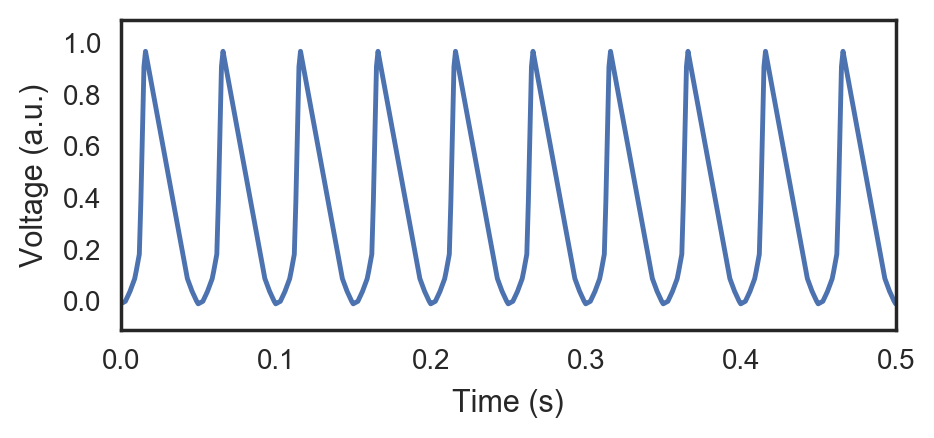

In [2]:
# Define sawtooth shape in some number of samples
x1 = np.array([0,.01,.05,.1,.2,1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.05,.01])
t1 = np.arange(len(x1))

# Interpolate sawtooth so it has 50 samples (50ms = 20Hz wave)
from scipy import interpolate
f = interpolate.interp1d(t1, x1)
t2 = np.linspace(0,len(t1)-1,50)
x2 = f(t2)

# Tile the new sawtooth to last 5 seconds
x = np.tile(x2,100)
Fs = 1000.
t = np.arange(0,5,.001)

# Plot sawtooth
plt.figure(figsize=(5,2))
plt.plot(t, x)
plt.ylim((-.1,1.1))
plt.xlim((0,.5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')

In [7]:
# Calculate comodulogram for that sawtooth
from pacpy.pac import comodulogram
from matplotlib import cm

# Comod parameters
fp = (6,40)
fa = (20,200)
dp = 2
da = 4
pac_method = 'mi_tort'

f_phases = np.arange(fp[0], fp[1]+dp, dp)
f_amps = np.arange(fa[0], fa[1]+da, da)

comod = comodulogram(x, x, fp, fa, dp, da,fs=Fs, pac_method=pac_method, w_lo=3, w_hi=3)

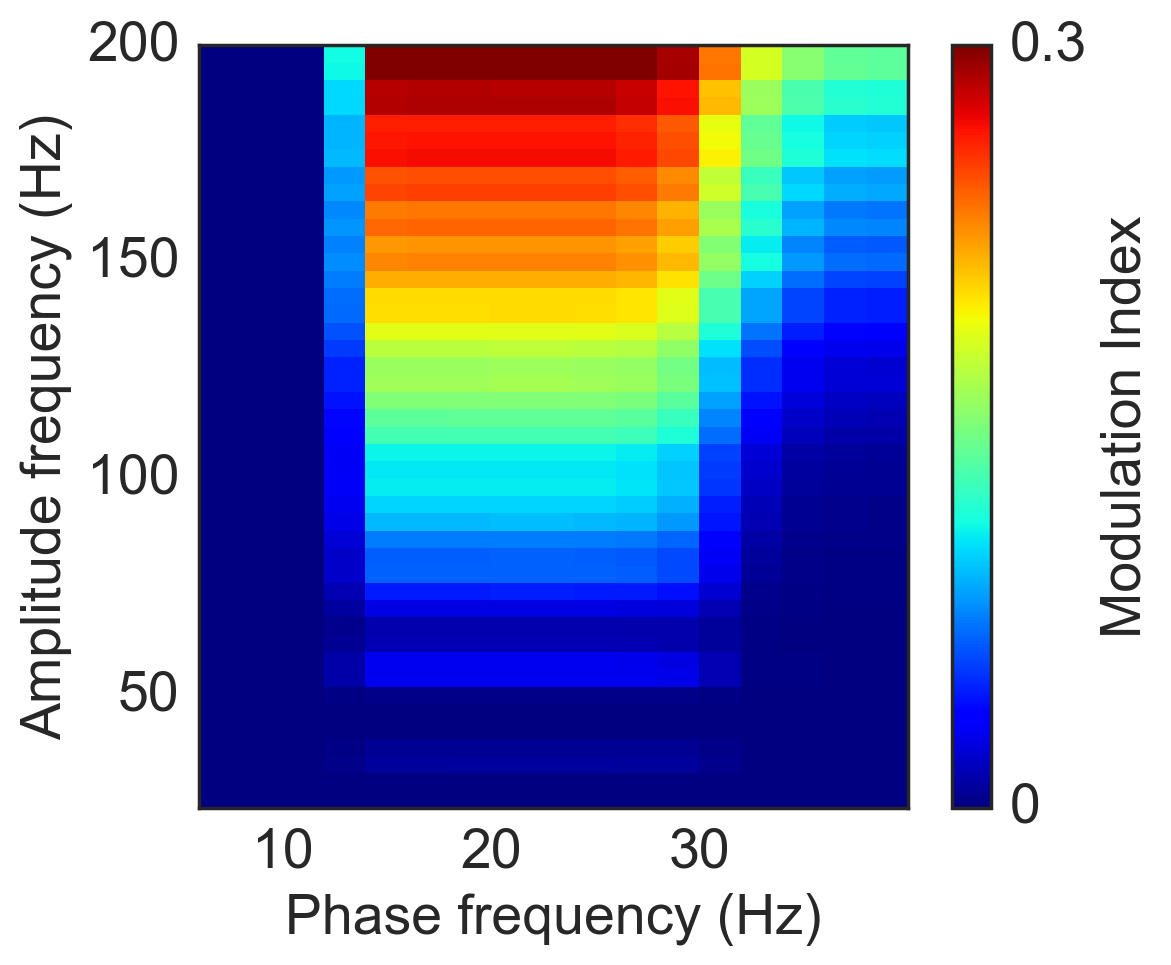

In [8]:
# Plot the comodulogram
plt.figure(figsize=(6,5))
clim = [0,.3]
cax = plt.pcolor(f_phases, f_amps+da, comod.T, cmap=cm.jet, vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(cax, ticks=clim)
cbar.ax.set_yticklabels(clim,size=20)
cbar.ax.set_ylabel('Modulation Index', size=20)
plt.axis([f_phases[0], f_phases[-1], f_amps[0]+da, f_amps[-1]])
plt.xlabel('Phase frequency (Hz)', size=20)
plt.ylabel('Amplitude frequency (Hz)', size=20)
plt.yticks(np.arange(50,250,50),size=20)
plt.xticks(np.arange(10,40,10),size=20)

plt.tight_layout()
figname = 'ReviewerResponse_SawtoothComod'
plt.savefig('C:/gh/fig/PD/'+figname + '.png')